In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [200]:
df = pd.read_csv("parkinsons_updrs.data.csv")

In [201]:
df.columns

Index(['index', 'subject#', 'age', 'sex', 'test_time', 'motor_UPDRS',
       'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5',
       'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [202]:
df.shape

(5875, 23)

In [203]:
df.dtypes

index              int64
subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

In [204]:
# Checking for Nulls
df.isnull().sum()

index            0
subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [205]:
df.describe()

,index,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,2937.000000,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,1696.110747,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,0.000000,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,1468.500000,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,2937.000000,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,4405.500000,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,5874.000000,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


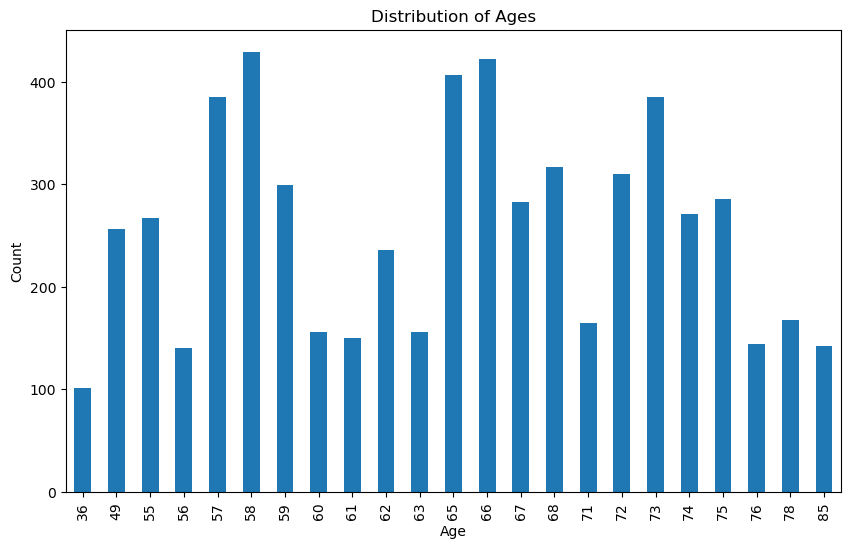

In [206]:
# Bar Graph for Age Distribution
plt.figure(figsize=(10, 6))
df['age'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

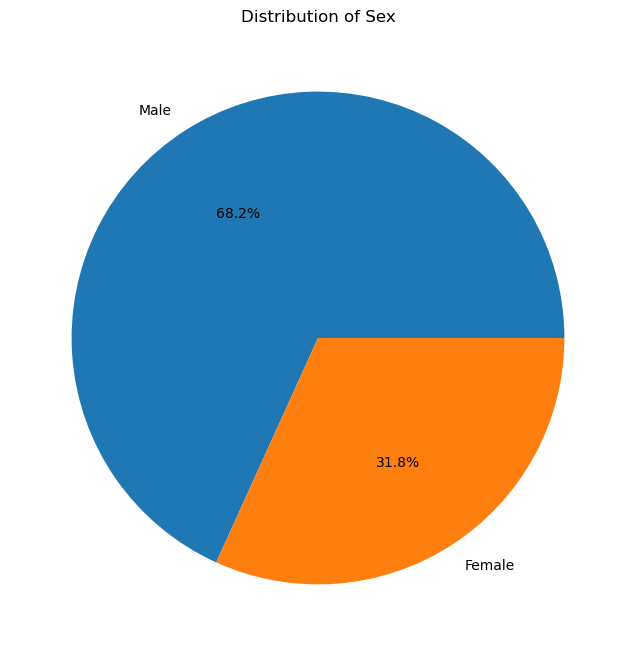

In [207]:
# Pie Chart for Gender Distribution
plt.figure(figsize=(8, 8))
df['sex'].value_counts().plot(kind='pie', labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Distribution of Sex')
plt.ylabel('')
plt.show()

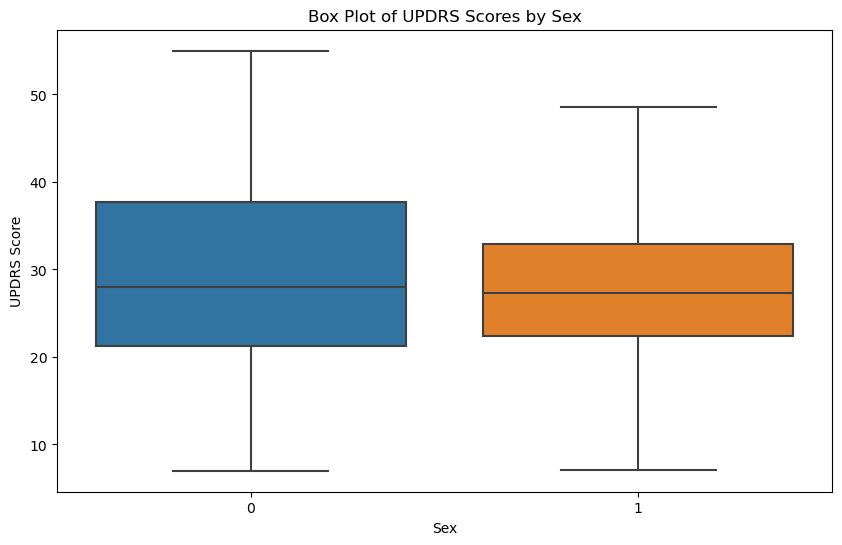

In [208]:
# Box Plot for UPDRS Scores by Sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='total_UPDRS', data=df)
plt.title('Box Plot of UPDRS Scores by Sex')
plt.xlabel('Sex')
plt.ylabel('UPDRS Score')
plt.show()

In [209]:
df = df.drop(['index', 'subject#'], axis=1)

In [210]:
df.columns

Index(['age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)',
       'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer',
       'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11',
       'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [211]:
X = df.drop('total_UPDRS', axis=1)
y = df['total_UPDRS']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
linear_model = LinearRegression()

In [214]:
linear_model.fit(X_train, y_train)

LinearRegression()

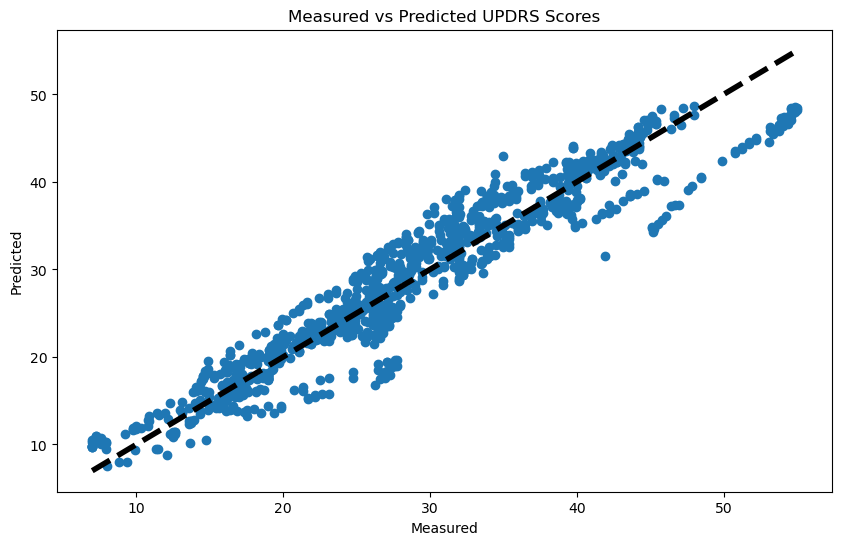

In [215]:
y_pred = linear_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted UPDRS Scores')
plt.show()

In [216]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 2.3619851866347736
Mean Squared Error (MSE): 9.976241884730008
Root Mean Squared Error (RMSE): 3.1585189384789207


In [217]:
df_reduced = df.drop(['motor_UPDRS', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
                      'Shimmer', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA'], axis=1)

In [218]:
X = df_reduced.drop('total_UPDRS', axis=1)
y = df_reduced['total_UPDRS']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

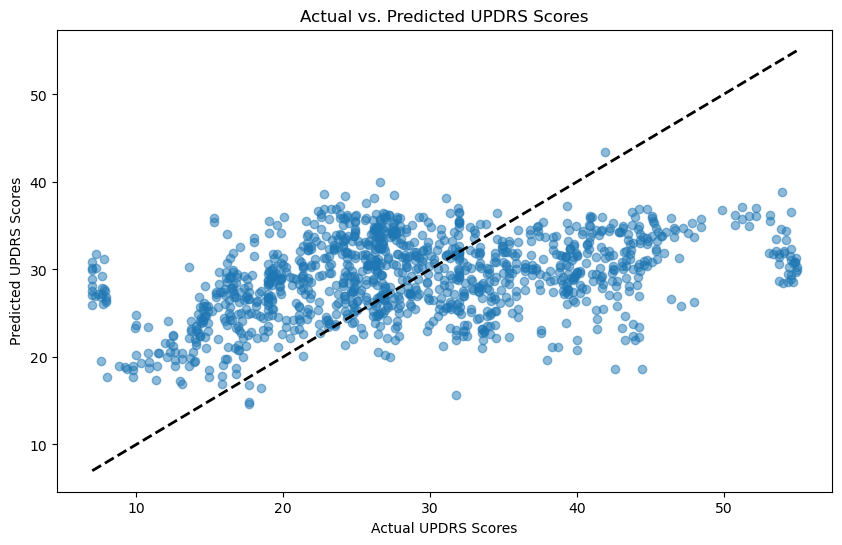

In [220]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual UPDRS Scores')
plt.ylabel('Predicted UPDRS Scores')
plt.title('Actual vs. Predicted UPDRS Scores')
plt.show()

In [221]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score (r2): {r2}")

Mean Absolute Error (MAE): 8.051144551047345
Mean Squared Error (MSE): 93.37043334797781
Root Mean Squared Error (RMSE): 9.662837748196841
R^2 Score (r2): 0.15740574800776153


In [222]:
from sklearn.preprocessing import PolynomialFeatures

X = df.drop('total_UPDRS', axis=1)
y = df['total_UPDRS']

degree = 2
polynomial_features = PolynomialFeatures(degree=degree)
X_poly = polynomial_features.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

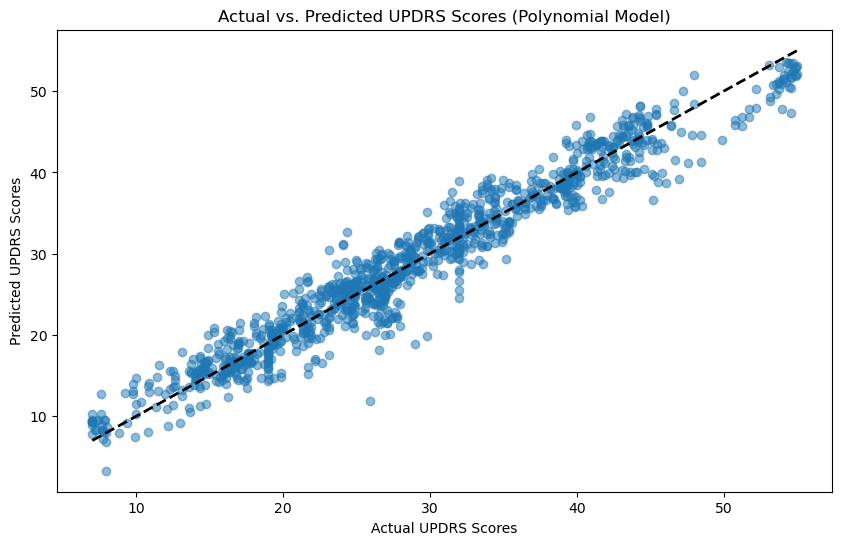

In [223]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
plt.xlabel('Actual UPDRS Scores')
plt.ylabel('Predicted UPDRS Scores')
plt.title('Actual vs. Predicted UPDRS Scores (Polynomial Model)')
plt.show()

In [224]:
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Mean Absolute Error (MAE): {mae_poly}")
print(f"Polynomial Mean Squared Error (MSE): {mse_poly}")
print(f"Polynomial Root Mean Squared Error (RMSE): {rmse_poly}")
print(f"Polynomial R^2 Score: {r2_poly}")

Polynomial Mean Absolute Error (MAE): 1.9427222863251838
Polynomial Mean Squared Error (MSE): 6.343338735023695
Polynomial Root Mean Squared Error (RMSE): 2.5185985656757004
Polynomial R^2 Score: 0.9427563890953448
